### Exercise 2
# Attention for Timeseries Prediction

This time we will learn how to implement attention and how it can improve prediction of timeseries data.

In [1]:
import os
import numpy as np
import pandas as pd
from pathlib import Path
from tqdm import tqdm

### PANJAPAN Dataset
Use `pandas` to read the PANJAPAN dataset. The dataset is organised as a directory full of CSV files, each of which contains a timeseries. Each timeseries has two values, a timestamp and a value.

In [2]:
dataset = []

DATAPATH = Path(f"{os.getenv('HOME')}/Datasets/PANJAPAN/csv")
for path in os.listdir(DATAPATH):
    if path.endswith(".csv"):
        dataset.append(pd.read_csv(DATAPATH / path))

print("Length", len(dataset))

Length 3873


In [3]:
dataset[0]

,value,timestamp
0,27.0,1588685400
1,27.0,1588689000
2,27.0,1588692600
3,27.0,1588696200
4,27.0,1588699800
...,...,...
834,27.0,1591687800
835,27.0,1591691400
836,27.0,1591695000
837,27.0,1591698600


### Visualize the Timeseries
Just to see what the dataset looks like, we make plots of the 

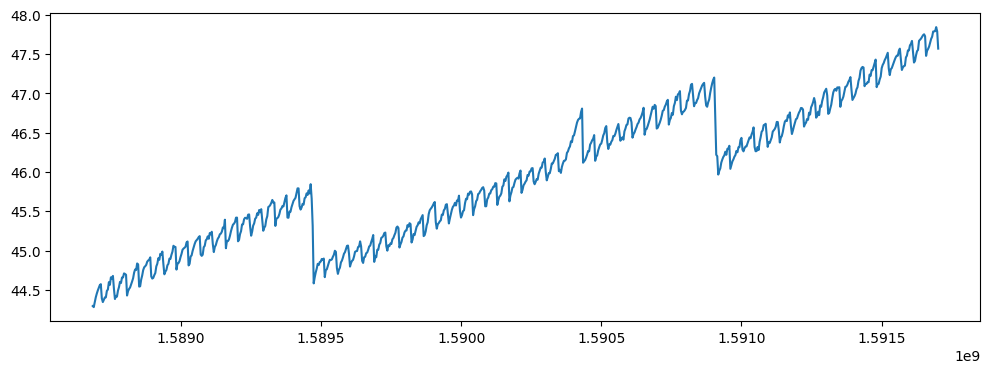

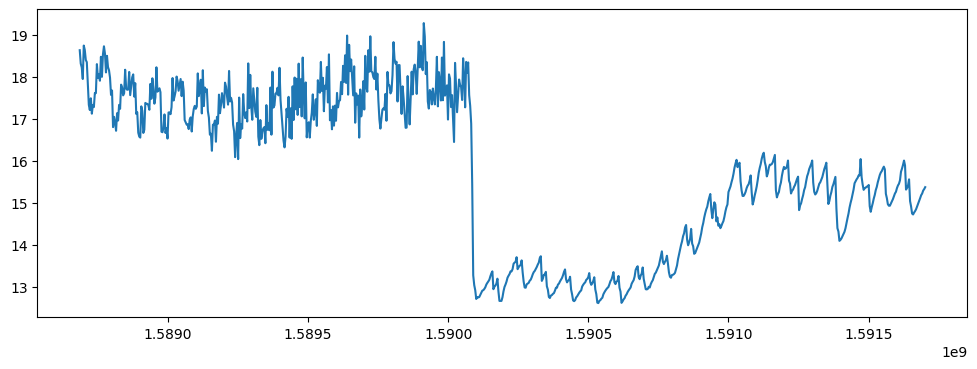

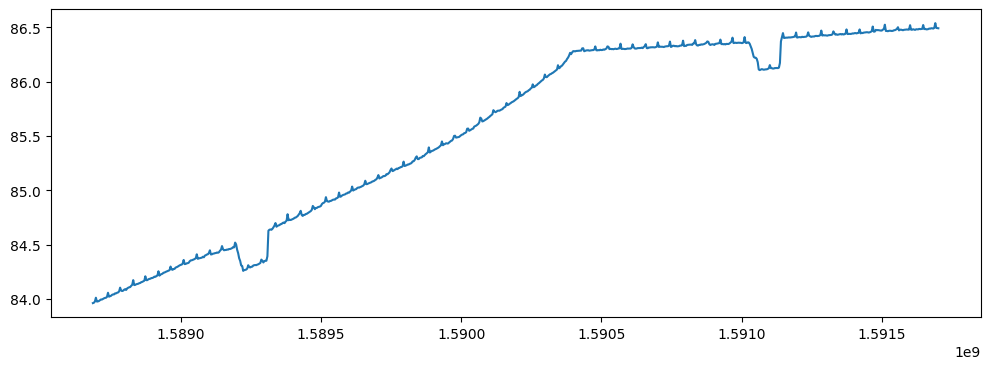

In [7]:
import matplotlib.pyplot as plt

def plot(value, timestamp):
    f = plt.figure(figsize=(12, 4))
    plt.plot(timestamp, value)
    # plt.xticks([])
    # plt.yticks([])
    return f
    
_ = plot(dataset[35]["value"], dataset[35]["timestamp"])
_ = plot(dataset[60]["value"], dataset[60]["timestamp"])
_ = plot(dataset[30]["value"], dataset[30]["timestamp"])

We will now split the dataset into training, validation and testing splits.

In [11]:
import random

# Randomly shuffle the timseries in the dataset
random.seed(1337)
random.shuffle(dataset)

In [20]:
from typing import List
from torch.utils.data import DataLoader, random_split

# Create three splits at 80%, 90% and 100% of the dataset
train_dataset, valid_dataset, tests_dataset = random_split(dataset, lengths=(0.8, 0.1, 0.1))

def collate(dfs: List[pd.DataFrame]):
    return [df.to_numpy() for df in dfs ]

train_dataloader = DataLoader(train_dataset, collate_fn=collate, shuffle=True, batch_size=24)
valid_dataloader = DataLoader(valid_dataset, collate_fn=collate, shuffle=True, batch_size=24) 
tests_dataloader = DataLoader(tests_dataset, collate_fn=collate, shuffle=True, batch_size=24)

### Build RNN to predict timeseries

In [21]:
import torch
from torch import nn
from torch.optim import SGD

In [22]:
class LSTM(nn.Module):
    def __init__(self, input_size = 1, hidden_size = 50, num_layers = 2, out_size = 1, batch_first=True):
        super().__init__()
        
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=batch_first)
        self.linear = nn.Linear(hidden_size,out_size)

        self.hidden = (
            torch.zeros(1, 1, hidden_size), 
            torch.zeros(1, 1, hidden_size))
    
    def forward(self,seq):
        out, self.hidden = self.lstm(seq.view(len(seq), 1, -1), self.hidden)
        pred = self.linear(out.view(len(seq), -1))
        return pred[-1]

rnn = LSTM()

In [26]:
EPOCHS = 5

for epoch in range(EPOCHS):
    for i, batch in tqdm(enumerate(train_dataloader), desc=f"Epoch {epoch}/{EPOCHS}"):
        rnn(batch)
        
        # TODO: unify secondly, minutely and daily
        # TODO: complete training

Epoch 0/5: 0it [00:00, ?it/s]


AttributeError: 'list' object has no attribute 'view'

In [ ]:
# ------

In [ ]:
def attention(query, key, value):
    return nn.functional.softmax(query * key / sqrt(len(key))) * value